In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('fraud.csv',index_col=0)

In [3]:
data.head()

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Remarks
Undergrad,,,,,,
NO,Single,68833,50047,10,YES,GOOD
YES,Divorced,33700,134075,18,YES,GOOD
NO,Married,36925,160205,30,YES,GOOD
YES,Single,50190,193264,15,YES,GOOD
NO,Married,81002,27533,28,NO,GOOD


In [4]:
data.shape

(600, 6)

In [5]:
data[data.isnull().any(axis=1)].head()

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Remarks
Undergrad,,,,,,


In [6]:
df=data.dropna()
df=df.rename({'Marital.Status':'marital','Taxable.Income':'taxinc','City.Population':'citypop','Work.Experience':'exp'},axis=1)
df

,marital,taxinc,citypop,exp,Urban,Remarks
Undergrad,,,,,,
NO,Single,68833,50047,10,YES,GOOD
YES,Divorced,33700,134075,18,YES,GOOD
NO,Married,36925,160205,30,YES,GOOD
YES,Single,50190,193264,15,YES,GOOD
NO,Married,81002,27533,28,NO,GOOD
...,...,...,...,...,...,...
YES,Divorced,76340,39492,7,YES,GOOD
YES,Divorced,69967,55369,2,YES,GOOD
NO,Divorced,47334,154058,0,YES,GOOD


In [7]:
dummies=pd.get_dummies(df.marital)
dummies.head(5)

,Divorced,Married,Single
Undergrad,,,
NO,0,0,1
YES,1,0,0
NO,0,1,0
YES,0,0,1
NO,0,1,0


In [8]:
df=pd.concat([df,dummies],axis='columns')
df.head(2)

,marital,taxinc,citypop,exp,Urban,Remarks,Divorced,Married,Single
Undergrad,,,,,,,,,
NO,Single,68833,50047,10,YES,GOOD,0,0,1
YES,Divorced,33700,134075,18,YES,GOOD,1,0,0


In [9]:
dummies=pd.get_dummies(df.Urban)
dummies.head(5)

,NO,YES
Undergrad,,
NO,0,1
YES,0,1
NO,0,1
YES,0,1
NO,1,0


In [10]:
df=pd.concat([df,dummies],axis='columns')
df.head(2)

,marital,taxinc,citypop,exp,Urban,Remarks,Divorced,Married,Single,NO,YES
Undergrad,,,,,,,,,,,
NO,Single,68833,50047,10,YES,GOOD,0,0,1,0,1
YES,Divorced,33700,134075,18,YES,GOOD,1,0,0,0,1


In [11]:
dummies=pd.get_dummies(df.Remarks)
dummies.head(5)

,GOOD,RISKY
Undergrad,,
NO,1,0
YES,1,0
NO,1,0
YES,1,0
NO,1,0


In [12]:
df=pd.concat([df,dummies],axis='columns')
df.head(2)

,marital,taxinc,citypop,exp,Urban,Remarks,Divorced,Married,Single,NO,YES,GOOD,RISKY
Undergrad,,,,,,,,,,,,,
NO,Single,68833,50047,10,YES,GOOD,0,0,1,0,1,1,0
YES,Divorced,33700,134075,18,YES,GOOD,1,0,0,0,1,1,0


In [13]:
df.drop('marital',axis='columns',inplace=True)
df.drop('Urban',axis='columns',inplace=True)
df.drop('Remarks',axis='columns',inplace=True)
df.drop('GOOD',axis='columns',inplace=True)
df

,taxinc,citypop,exp,Divorced,Married,Single,NO,YES,RISKY
Undergrad,,,,,,,,,
NO,68833,50047,10,0,0,1,0,1,0
YES,33700,134075,18,1,0,0,0,1,0
NO,36925,160205,30,0,1,0,0,1,0
YES,50190,193264,15,0,0,1,0,1,0
NO,81002,27533,28,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
YES,76340,39492,7,1,0,0,0,1,0
YES,69967,55369,2,1,0,0,0,1,0
NO,47334,154058,0,1,0,0,0,1,0


In [14]:
x=df.iloc[:,0:8]
y=df.iloc[:,8]

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.25)

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [17]:
y_pred=rf.predict(x_test)

In [18]:
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds= roc_curve(y_test,y_pred)
roc_auc= auc(false_positive_rate,true_positive_rate)
roc_auc

1.0

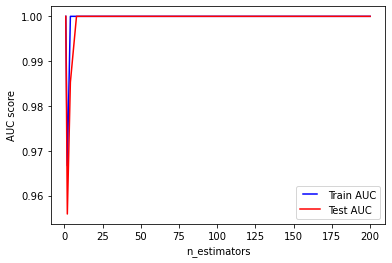

In [19]:
n_estimators=[1,2,4,8,16,32,64,100,200]
train_results=[]
test_results=[]

for estimator in n_estimators:
    rf=RandomForestClassifier(n_estimators=estimator,n_jobs=-1)
    rf.fit(x_train,y_train)
    train_pred= rf.predict(x_train)
    false_positive_rate,true_positive_rate,thresholds= roc_curve(y_train,train_pred)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    train_results.append(roc_auc)
    y_pred=rf.predict(x_test)
    false_positive_rate,true_positive_rate,thresholds= roc_curve(y_test,y_pred)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    test_results.append(roc_auc)
    
    
    
from matplotlib.legend_handler import HandlerLine2D
line1, =plt.plot(n_estimators,train_results,"b",label="Train AUC")
line2, =plt.plot(n_estimators,test_results,"r",label="Test AUC") 
plt.legend(handler_map={line1:HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()